### Visualize CMS data from the Medicare-Provider-Utilization-Payment public use file, year 2012.
Janos A. Perge, 7/31/2016

To assess the risk associated with a medical procedure, one needs to better  
understand the physician who carries out the procedure. This visualization exercise  
explores the relationships between medical procedures and their cost across physician specialities.

Before running this script, first run procedures_by_provider2.r to open, rearrange, combine and save CMS data  
needed for this visualization exercise. 

In [1]:
# load R-packages
rm(list=ls())

packageList = c("data.table","stringr",'plyr', 'ggplot2')

is_installed <- function(mypkg) is.element(mypkg, installed.packages()[,1])

load_or_install<-function(package_names)
{
  for(package_name in package_names)
  {
    if(!is_installed(package_name))
    {
      install.packages(package_name,repos="http://lib.stat.cmu.edu/R/CRAN")
    }
    options(java.parameters = "-Xmx8g")
    library(package_name,character.only=TRUE,quietly=TRUE,verbose=FALSE)
  }
}

load_or_install(packageList)

#### Load and inspect data

In [2]:
data_filename = 'provider_vs_procedures_2_2012.RData'

start = Sys.time()
load(data_filename)
Sys.time()-start

Time difference of 9.226338 secs

In [3]:
physician_info = data.table(physician_info, key='provider_type')
head(physician_info)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,medical.school.name,graduation.year
1,1003833625,PETERSON,JOHN,,M.D.,M,I,1400 W PARK ST,,URBANA,618012334,IL,US,Addiction Medicine,Y,O,UNIVERSITY OF ILLINOIS AT CHICAGO HEALTH SCIENCE CENTER,1989
2,1003975954,THRASHER,BRENTON,D,M.D.,M,I,811 S J ST,,LAKE WORTH,334605043,FL,US,Addiction Medicine,Y,O,NA,NA
3,1003998329,JONES,DOUGLAS,E,M.D.,M,I,6005 PARK AVENUE,SUITE 307,MEMPHIS,381195213,TN,US,Addiction Medicine,Y,O,OTHER,1984
4,1013202266,KERN,AUDREY,M,MD,F,I,255 ROUTE 108,,SOMERSWORTH,038781543,NH,US,Addiction Medicine,Y,O,OTHER,1988
5,1013952175,REZNIKOFF,CHARLES,P,MD,M,I,807 PARK AVE,,MINNEAPOLIS,554041136,MN,US,Addiction Medicine,Y,F,UNIVERSITY OF WISCONSIN MEDICAL SCHOOL,2002
6,1013952852,ROUT,W,R,MD,M,I,1600 SW ARCHER RD,,GAINESVILLE,326103003,FL,US,Addiction Medicine,Y,O,NA,NA


In [4]:
# Combine different procedures per provider for showing overall workload:
npi_vs_tot_count = npi_vs_ccs[, .(tot_cnt = sum(proc_cnt, na.rm=T), med_efficacy=median(med_proc_per_patient, na.rm=T), 
                                  tot_pay=sum(est_pay_amt, na.rm=T), tot_bene=sum(bene_cnt, na.rm=T)), by=npi]
npi_vs_tot_count = npi_vs_tot_count[,avg_pay := tot_pay/tot_cnt]

In [5]:
head(npi_vs_ccs)

,npi,ccs_code,proc_cnt,uniq_cnt,day_srvc_cnt,bene_cnt,med_proc_per_patient,est_allo_amt,est_pay_amt,na.rm
1,1.003000e+09,2.270000e+02,1.224000e+03,9.130000e+02,1.224000e+03,9.130000e+02,1.056818e+00,1.113588e+05,8.888709e+04,1.000000e+00
2,1.003000e+09,2.340000e+02,7.673000e+03,4.464000e+03,5.276000e+03,4.464000e+03,1.271663e+00,2.867675e+05,2.210911e+05,1.000000e+00
3,1.003000e+09,2.270000e+02,5.200000e+01,4.500000e+01,5.200000e+01,4.500000e+01,1.205882e+00,6.077120e+03,4.760960e+03,1.000000e+00
4,1.00300e+09,2.12000e+02,2.30000e+01,2.30000e+01,2.30000e+01,2.30000e+01,1.00000e+00,1.68981e+03,1.34881e+03,1.00000e+00
5,1.003000e+09,2.130000e+02,8.110000e+02,9.000000e+01,6.080000e+02,9.000000e+01,6.696970e+00,1.943511e+04,1.506231e+04,1.000000e+00
6,1.003000e+09,5.400000e+01,2.000000e+01,1.700000e+01,1.900000e+01,1.700000e+01,1.176471e+00,2.429800e+03,1.943800e+03,1.000000e+00


In [6]:
head(conversion_table)

,hcpcs_code,hcpcs_description,ccs_code,css_desc
1,00100,Anesthesia for procedure on salivary gland with biopsy,232,Anesthesia
2,00102,Anesthesia for procedure to repair lip defect present at birth,232,Anesthesia
3,00103,Anesthesia for procedure on eyelid,232,Anesthesia
4,00104,Anesthesia for electric shock treatment,232,Anesthesia
5,00120,Anesthesia for biopsy of external middle and inner ear,232,Anesthesia
6,00126,Anesthesia for incision of ear drum,232,Anesthesia


In [7]:
# top provider specialities and head-counts:
counts = data.table(table(physician_info$provider_type))
#range(counts$Freq)
counts = setorder(counts, -N, na.last=TRUE)
top10 = counts[seq(1,30),]
midTierSpecialities = counts[seq(21,32),]
top10

,V1,N
1,Internal Medicine,91525
2,Family Practice,77792
3,Nurse Practitioner,52196
4,Physician Assistant,40403
5,Emergency Medicine,37254
6,Physical Therapist,36784
7,Chiropractic,36399
8,Mass Immunization Roster Biller,33013
9,Anesthesiology,32641
10,CRNA,30160


#### Diversity of revenues across specialities

In [8]:
setkey(physician_info,npi)
sub_npi_ccs = npi_vs_tot_count[physician_info] 

In [9]:
median.proc.pay.spec = sub_npi_ccs[, .(med.pay = median(avg_pay, na.rm=T), med.proc = median(tot_cnt, na.rm=T)), by=provider_type]
median.proc.pay.spec = setorder(median.proc.pay.spec, med.pay, na.last=TRUE)
median.proc.pay.spec = median.proc.pay.spec[seq(60,79),]
providers = median.proc.pay.spec$provider_type

In [10]:
median.proc.pay.spec

,provider_type,med.pay,med.proc
1,Gynecological/Oncology,66.4552112057949,309
2,Speech Language Pathologist,66.8319028342834,220
3,Mammographic Screening Center,68.0621008920277,1066.5
4,Peripheral Vascular Disease,68.1641628734175,1523.5
5,Infectious Disease,69.1272170211881,894
6,Neurology,71.31017777836,889
7,Pulmonary Disease,71.8480411807656,1621
8,Radiation Oncology,72.5315728726676,2007
9,Plastic and Reconstructive Surgery,73.1029273385183,132
10,Anesthesiologist Assistants,74.0555000001,58


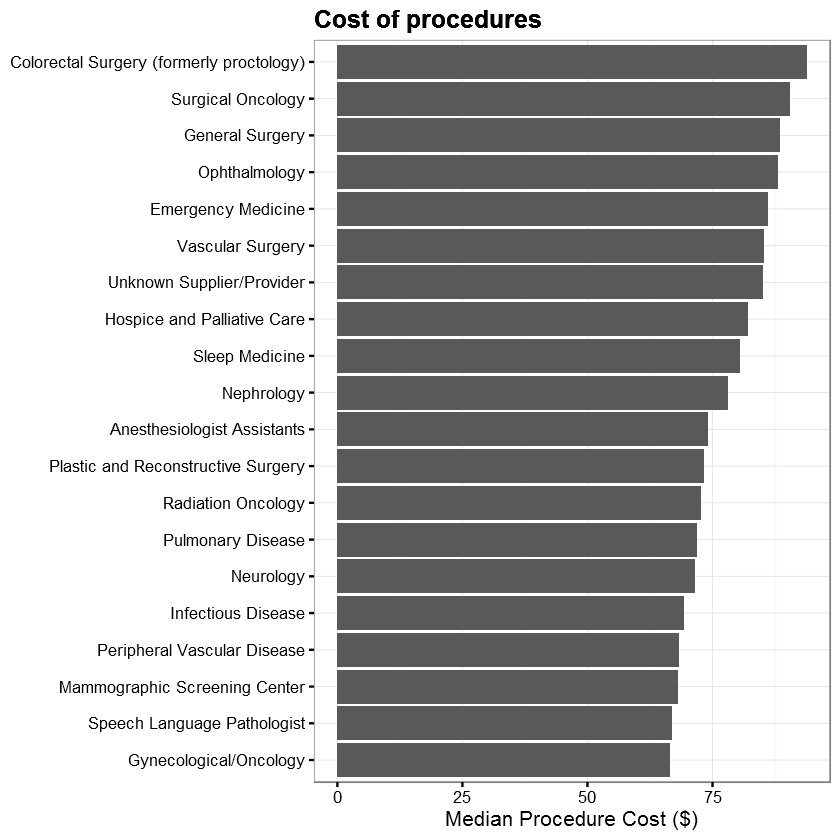

In [11]:
g <- ggplot(median.proc.pay.spec, aes(x=provider_type, y=med.pay)) 
g + geom_bar(position="dodge",stat="identity") +coord_flip() +
    ggtitle("Cost of procedures")+
    labs(y='Median Procedure Cost ($)')+
    scale_fill_grey()+
    theme_bw()+
    scale_x_discrete(limits=median.proc.pay.spec$provider_type)+
    theme(
      axis.title.y=element_blank(),                            #removes y-axis label
      text=element_text(family="serif"),                       #changes font on entire graph
      plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
      )

1) Above: Median cost of procedures across specialities

#### Diversity of revenues within a speciality

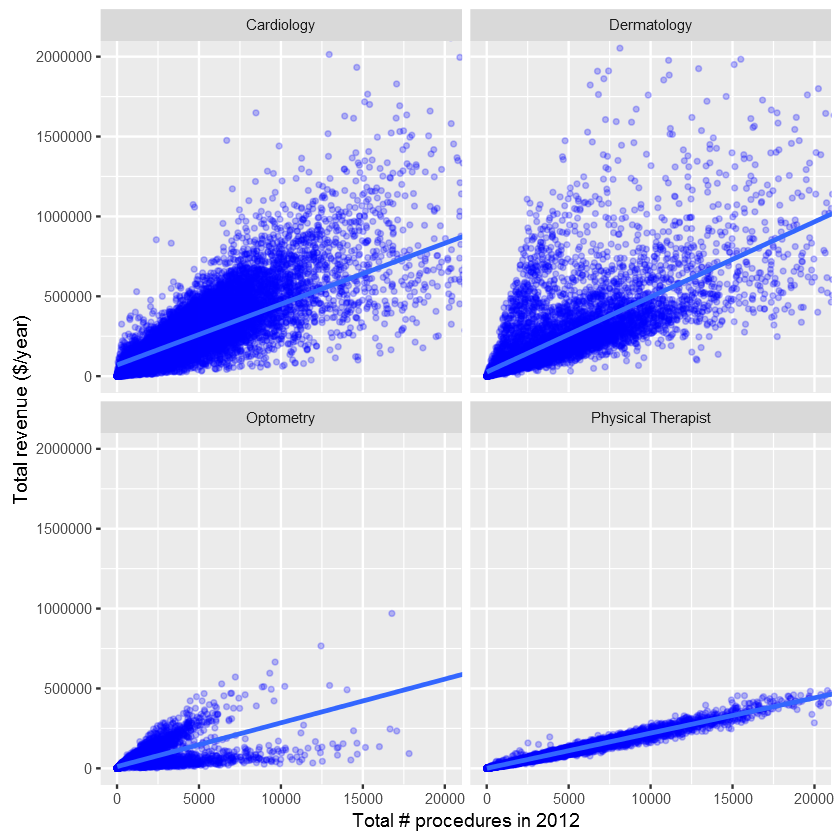

In [12]:
#select multiple specialities
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Optometry')
cc = physician_info[provider_type %in% phys_sel] #provider info (and list of NPIs) within the top popular provider types. 
setkey(cc,nppes_entity_code)  #remove organizations
cc = cc[nppes_entity_code=='I']
setkey(cc,npi) # join on selected npi numbers (of popular types), pulling the npi specific info into procedure count
sub_npi_ccs = npi_vs_tot_count[cc] 

g <- ggplot(sub_npi_ccs, aes(tot_cnt, tot_pay)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g = g + facet_wrap(~provider_type, ncol=2)+geom_smooth(method = 'lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,20000),ylim = c(0,2000000))
g + labs(x='Total # procedures in 2012', y='Total revenue ($/year)', title= 'Diversity of revenues within a speciality')

2) Cost of procedures varies significantly within specialities. Each dot corresponds to a physician. Certain disciplines vary more, while others (e.g. physical therapist) the cost is much more a function of procedure counts.  
   
Some specialities could be divided into subspecialities (e.g. Dermatology, Optometry). These subspecialities
have different work loads and pay scales. Other examples of this are: 'Pathology', 'Neurology', 'Radiation Oncology'-three groups, 'Clinical Laboratory'.  

Below I examine this closer by looking at what procedures these providers perform. 

#### What are the subgroups within optometry? 

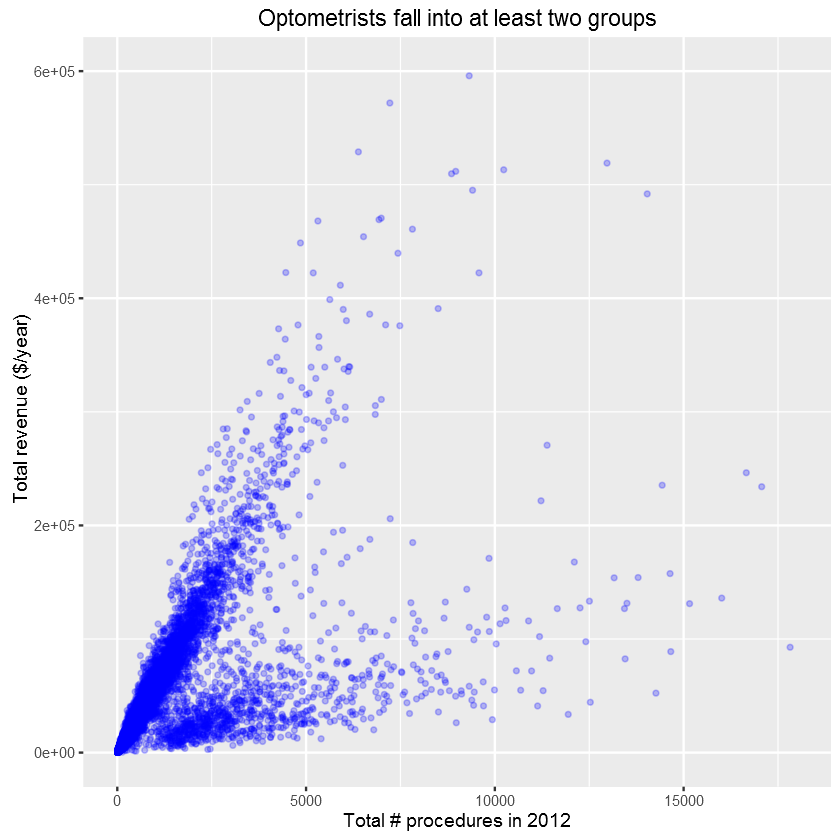

In [13]:
#select a single speciality
cc = physician_info[provider_type == 'Optometry']
setkey(cc,nppes_entity_code)  #remove organizations
cc = cc[nppes_entity_code=='I']
setkey(cc,npi) # join on selected npi numbers, pulling the npi specific info into procedure count
sub_npi_ccs = npi_vs_tot_count[cc] 

g <- ggplot(sub_npi_ccs, aes(tot_cnt, tot_pay)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g = g + coord_cartesian(xlim = c(0,18000),ylim = c(0,600000))
g + labs(x='Total # procedures in 2012', y='Total revenue ($/year)', title= 'Optometrists fall into at least two groups')

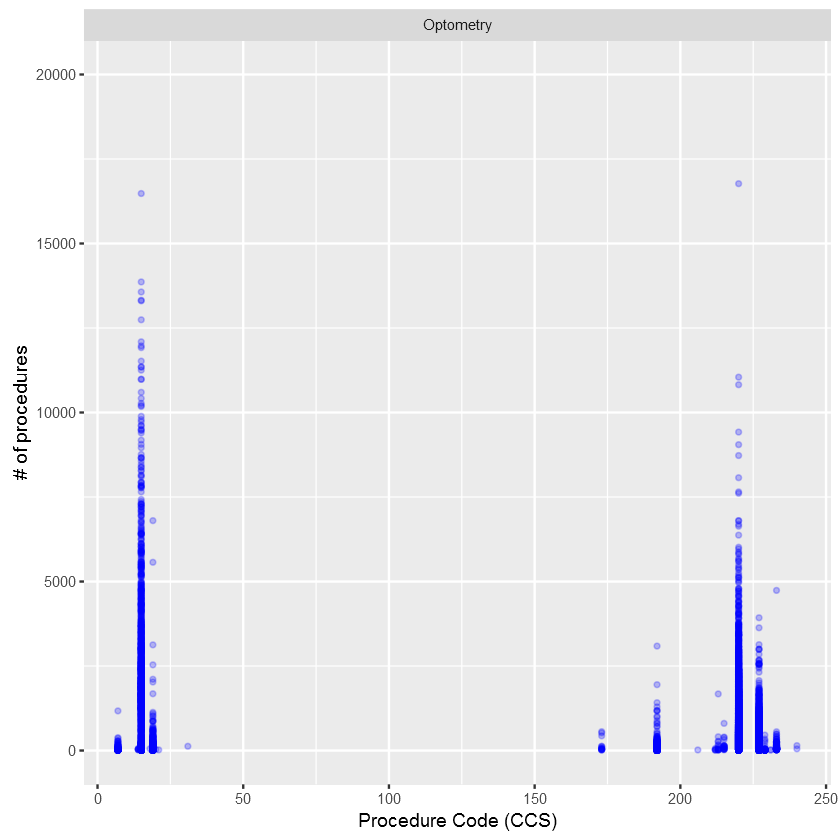

In [14]:
#CCS codes within selected speciality
cc = physician_info[provider_type == 'Optometry']
setkey(cc,nppes_entity_code)  #remove organizations
cc = cc[nppes_entity_code=='I']
setkey(cc,npi)
sub_npi_ccs = npi_vs_ccs[cc] # join on selected npi numbers, pulling the npi specific info into procedure count

g <- ggplot(sub_npi_ccs, aes(ccs_code, proc_cnt)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g <- g + facet_wrap(~provider_type, nrow=1) + coord_cartesian(ylim = c(0,20000))
g + labs(x='Procedure Code (CCS)', y='# of procedures', title= 'Distribution of procedure codes within Optometry')

In [15]:
# Tally of procedure codes within opthalmologists:
common_procedures = data.table(table(sub_npi_ccs$ccs_code))
common_procedures$V1 = as.numeric(common_procedures$V1)
setkey(common_procedures,V1)

codenames = conversion_table[,.(css_desc,ccs_code)] #this altered the original table as well
setkey(codenames,ccs_code)
codenames = unique(codenames)

common_procedures = common_procedures[codenames, nomatch=0] #inner join
common_procedures

,V1,N,css_desc
1,7,211,Other diagnostic nervous system procedures
2,14,7,Glaucoma procedures
3,15,5184,Lens and cataract procedures
4,18,1,Diagnostic procedures on eye
5,19,1294,"Other therapeutic procedures on eyelids, conjunctiva, cornea"
6,20,1,Other intraocular therapeutic procedures
7,21,1,Other extraocular muscle and orbit therapeutic procedures
8,31,1,"Diagnostic procedures on nose, mouth and pharynx"
9,173,15,Other diagnostic procedures on skin and subcutaneous tissue
10,192,2383,Diagnostic ultrasound of head and neck


Most common procedures are CCS15:Lens and cataract procedures, CCS220: Ophthalmologic and otologic diagnosis and treatment,  
and CCS227: Other diagnostic procedures (interview, evaluation, consultation). What is the distribution of CCS15 and CCS227  
across the opthalmologists?

In [16]:
#Rearrange three most common procedure code counts into three columns
setkey(sub_npi_ccs, ccs_code)
common.procs = sub_npi_ccs[ccs_code %in% c(15,220,227)]

longdat = common.procs[,.(npi,ccs_code, proc_cnt)] 
setkey(longdat, "npi","ccs_code")
head(longdat)

,npi,ccs_code,proc_cnt
1,1003015363,220,200
2,1003016304,220,32
3,1003016304,227,168
4,1003016361,220,44
5,1003021205,220,605
6,1003021205,227,456


In [17]:
widedat = dcast(longdat, npi ~ ccs_code) #convert data.table from long to wide format
widedat[is.na(widedat)] = 1
setnames(widedat,"15","code15")
setnames(widedat,"220","code220")
setnames(widedat,"227","code227")

widedat = widedat[,ratio := code15/code220]
widedat = widedat[,lensProv := ratio<0.5]

setkey(widedat,lensProv)
cataractProvs = widedat[lensProv==TRUE]
head(cataractProvs)

Using 'proc_cnt' as value column. Use 'value.var' to override


,npi,code15,code220,code227,ratio,lensProv
1,1.003015e+09,1.000000e+00,2.000000e+02,1.000000e+00,5.000000e-03,1.000000e+00
2,1.003016e+09,1.000000e+00,3.200000e+01,1.680000e+02,3.125000e-02,1.000000e+00
3,1.003016e+09,1.000000e+00,4.400000e+01,1.000000e+00,2.272727e-02,1.000000e+00
4,1.003021e+09,1.000000e+00,6.050000e+02,4.560000e+02,1.652893e-03,1.000000e+00
5,1.003025e+09,1.000000e+00,3.970000e+02,1.000000e+00,2.518892e-03,1.000000e+00
6,1.003026e+09,3.800000e+01,1.920000e+02,1.000000e+00,1.979167e-01,1.000000e+00


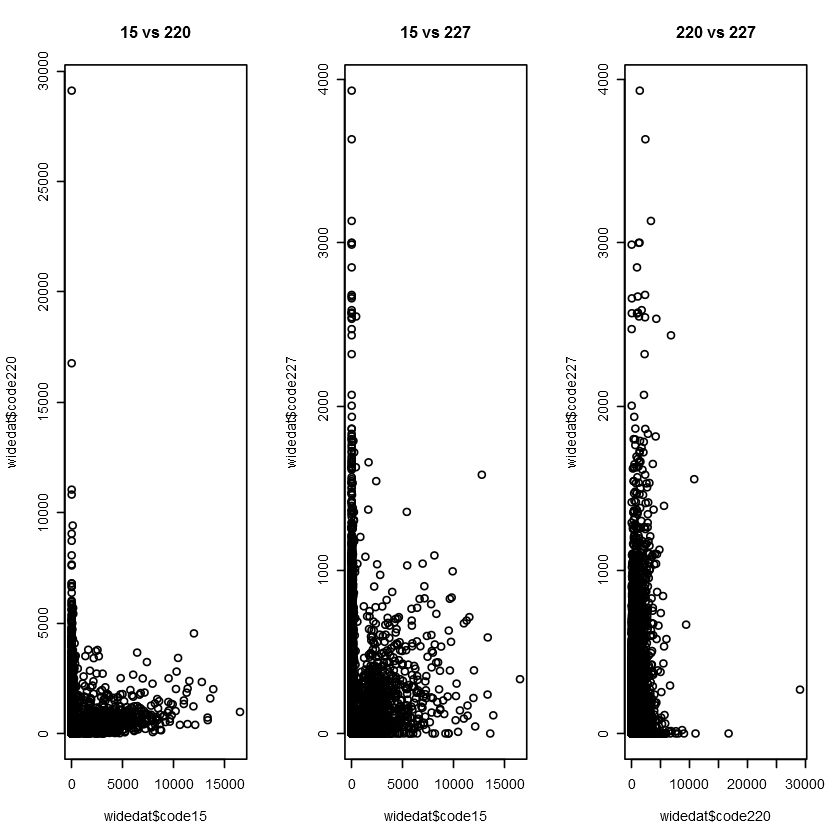

In [33]:
par(mfrow = c(1,3))
plot(widedat$code15, widedat$code220, main ='15 vs 220')
plot(widedat$code15, widedat$code227, main='15 vs 227')
plot(widedat$code220, widedat$code227, main='220 vs 227')
mtext('Relationship of the three most common codes within opthalmology', outer=TRUE)

Code 15 seems to be different from code220 or 227. So the ratio of procedures say code15/code220 might characterize a provider.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
: Removed 1147 rows containing non-finite values (stat_density).

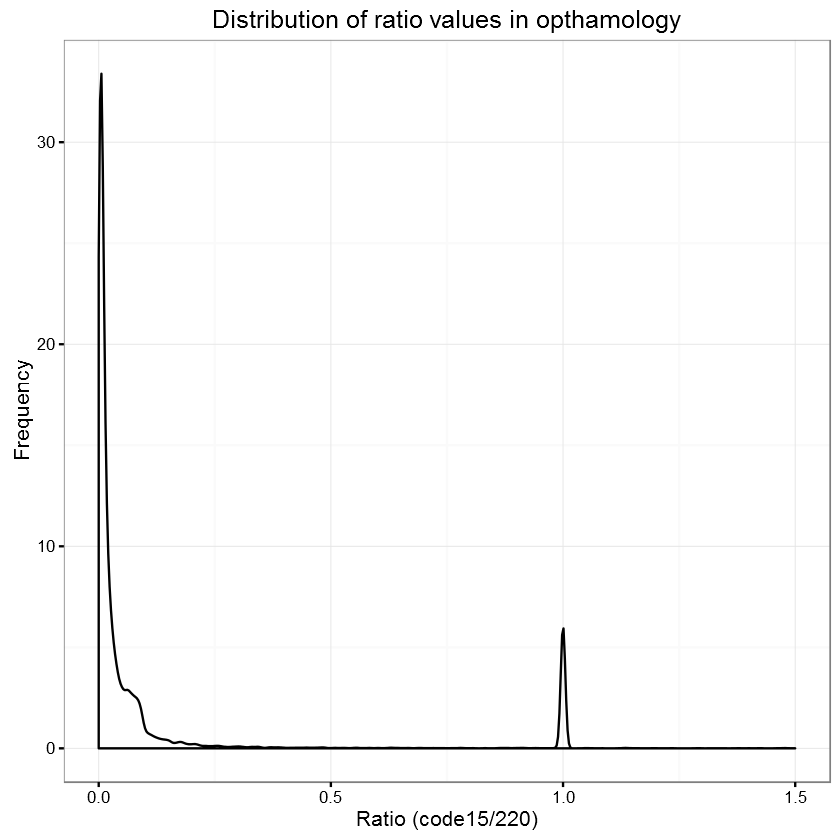

In [42]:
qplot(ratio, data = widedat, geom = 'density') + xlim(0, 3) + 
labs(x='Ratio (code15/220)',y='Frequency', title='Distribution of ratio values in opthamology')+
xlim(0, 1.5)+ theme_bw()


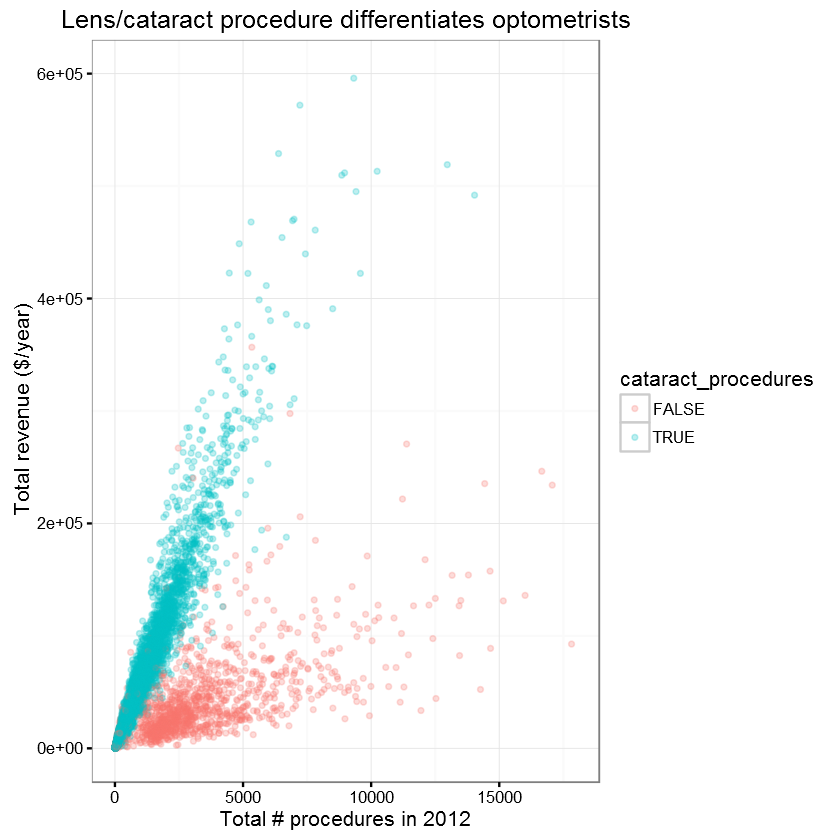

In [43]:
#Ratio of procedures shows two groups. Use this ratio as a label in earlier plot:
cc = physician_info[provider_type == 'Optometry']
setkey(cc,nppes_entity_code)  #remove organizations
cc = cc[nppes_entity_code=='I']
setkey(cc,npi) # join on selected npi numbers, pulling the npi specific info into procedure count
sub_npi_ccs = npi_vs_tot_count[cc]
sub_npi_ccs = sub_npi_ccs[,cataract_procedures := npi %in% cataractProvs$npi]

g <- ggplot(sub_npi_ccs, aes(tot_cnt, tot_pay, color=cataract_procedures)) + geom_point(size = 1, alpha=1/4) 
g = g + coord_cartesian(xlim = c(0,18000),ylim = c(0,600000))
g + labs(x='Total # procedures in 2012', y='Total revenue ($/year)', title= 'Lens/cataract procedure differentiates optometrists')+
theme_bw()

#### Gender inequality

In [21]:
sub_npi_ccs = npi_vs_tot_count[physician_info] 

# Male providers outnumber female ones by nearly 2-fold:
table(physician_info$nppes_provider_gender)


            F      M 
 55532 302008 523104 

Male providers on average also bring in more revenue on medicare claims. While this was initially surprising,
I noticed that males also perform twice as many procedures. The cost per service is actually very comparable 
across gender:

In [22]:
gend_pay = sub_npi_ccs[,.(tot_revenue=median(tot_pay, na.rm=T), proc_cnt = median(tot_cnt, na.rm=T), cost_per_service = median(avg_pay, na.rm=T)), by= nppes_provider_gender]
gend_pay

,nppes_provider_gender,tot_revenue,proc_cnt,cost_per_service
1,M,44256.7949999855,797,54.1020417853929
2,F,16097.3399999405,345,47.0228464335429
3,,7186.300000008,330,19.0222961096763


In [23]:
#Procedure counts and costs across specialities:

providers = c("Clinical Laboratory", "Pathology", "Pulmonary Disease", "Podiatry", "Rheumatology", "Radiation Oncology",
              "Ophthalmology", "Allergy/Immunology", "Nephrology", "Interventional Pain Management",
              "Urology", "Cardiac Electrophysiology", "Dermatology", "Hematology/Oncology", "Cardiology",
              "Diagnostic Radiology", "Ambulance Service Supplier", "Portable X-ray", 
              "Radiation Therapy")

median.proc.pay.spec = sub_npi_ccs[, .(med.pay = median(avg_pay, na.rm=T), 
                                   med.proc = median(tot_cnt, na.rm=T)), 
                                   by=.(provider_type,nppes_provider_gender) ]

setkey(median.proc.pay.spec,nppes_provider_gender)
median.proc.pay.spec = median.proc.pay.spec[nppes_provider_gender  %in% c("M","F")]
setkey(median.proc.pay.spec,provider_type)
median.proc.pay.spec = median.proc.pay.spec[provider_type  %in% providers]

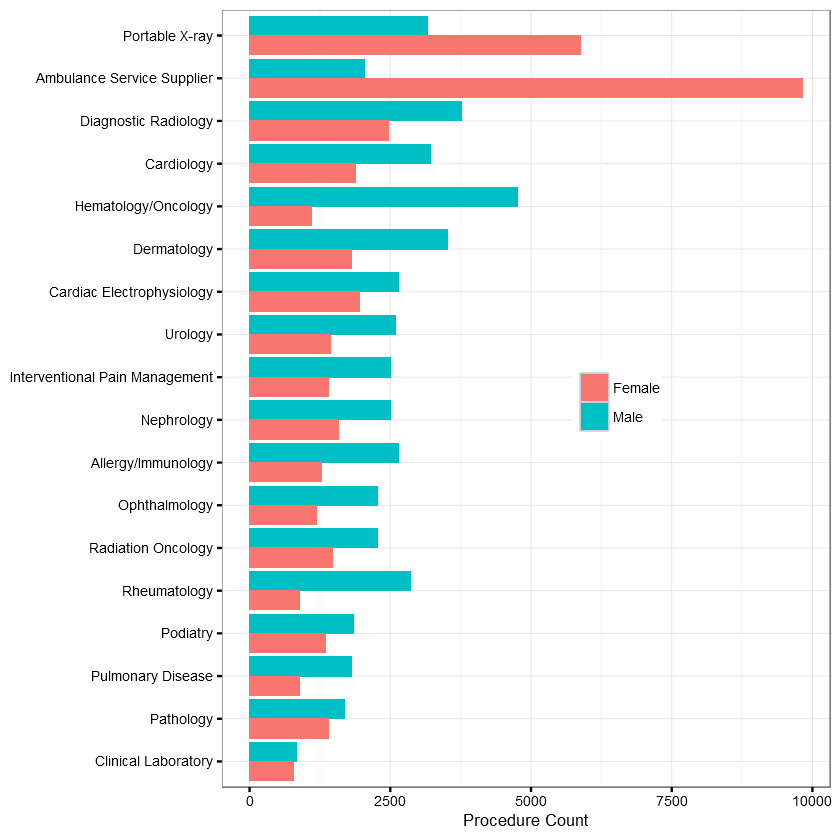

In [24]:
ggplot(data=median.proc.pay.spec, aes(x=provider_type,y=med.proc,fill=factor(nppes_provider_gender))) +
    geom_bar(position="dodge",stat="identity") + 
    coord_flip() +
    labs(y='Procedure Count')+
    theme_bw()+
    scale_x_discrete(limits=providers)+
    theme(
        legend.title=element_blank(),  
        legend.position=c(.65,.5),
        axis.title.y=element_blank(), #removes y-axis label
        text=element_text(family="serif",size=10), #changes font on entire graph
        plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
        ) +
    scale_fill_discrete(labels = c("Female", "Male")) 

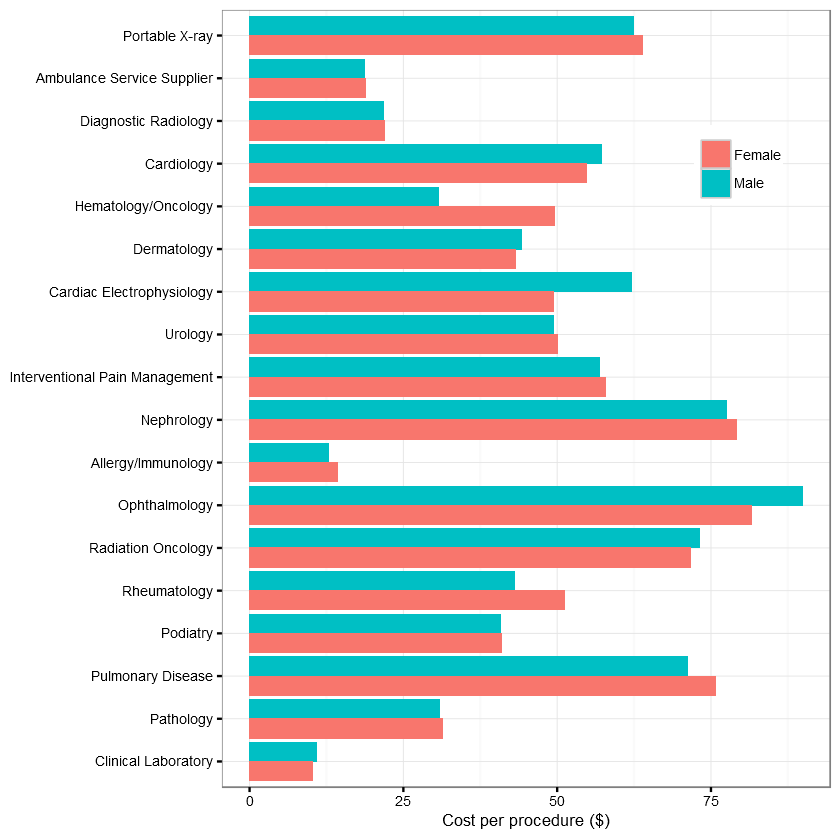

In [25]:
ggplot(data=median.proc.pay.spec, aes(x=provider_type,y=med.pay,fill=factor(nppes_provider_gender))) +
    geom_bar(position="dodge",stat="identity") + 
    coord_flip() +
    labs(y='Cost per procedure ($)')+
    theme_bw()+
    scale_x_discrete(limits=providers)+
    theme(
        legend.title=element_blank(),  
        legend.position=c(.85,.8),
        axis.title.y=element_blank(), #removes y-axis label
        text=element_text(family="serif",size=10), #changes font on entire graph
        plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
        ) +
    scale_fill_discrete(labels = c("Female", "Male")) 

Male providers charge more for the total services because they also perform more procedures

#### Physician's productivity over years of expertise

In [26]:
#Plot only data points with known graduation years (~75% of all providers)
phys.info = physician_info[!graduation.year %in% NA]

#Select for physician types:
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Orthopedic Surgery')
cc = phys.info[provider_type %in% phys_sel] #provider info (and list of npis) within the top popular provider types. 
setkey(cc,npi)
sub_npi_ccs = npi_vs_tot_count[cc] # inner join on selected npi numbers, pulling the npi specific info into procedure count
sub_npi_ccs = sub_npi_ccs[,expyrs := 2012-graduation.year]

median_freq = sub_npi_ccs[, .(medi = median(tot_cnt, na.rm=T), med_bene=median(as.numeric(tot_bene), na.rm=T), med_effic=median(med_efficacy, na.rm=T), na.rm=T), by=.(expyrs, provider_type)]

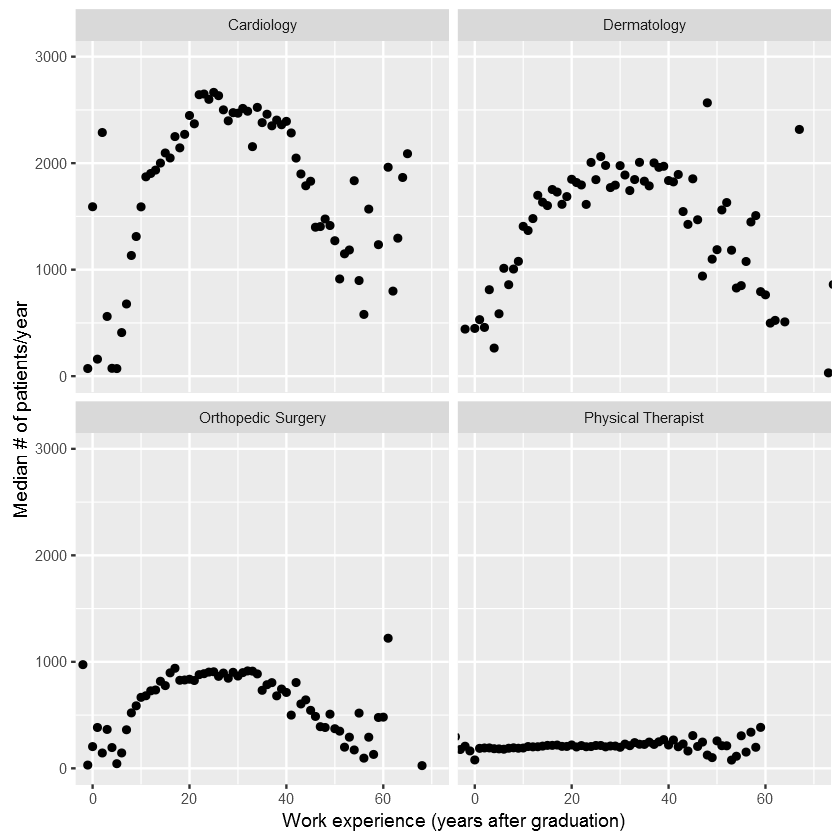

In [27]:
g <- ggplot(median_freq, aes(expyrs, med_bene)) + geom_point() 
g = g + facet_wrap(~provider_type, nrow=2) #+geom_smooth(method='lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,70),ylim = c(0,3000))
g + labs(x='Work experience (years after graduation)', y='Median # of patients/year')

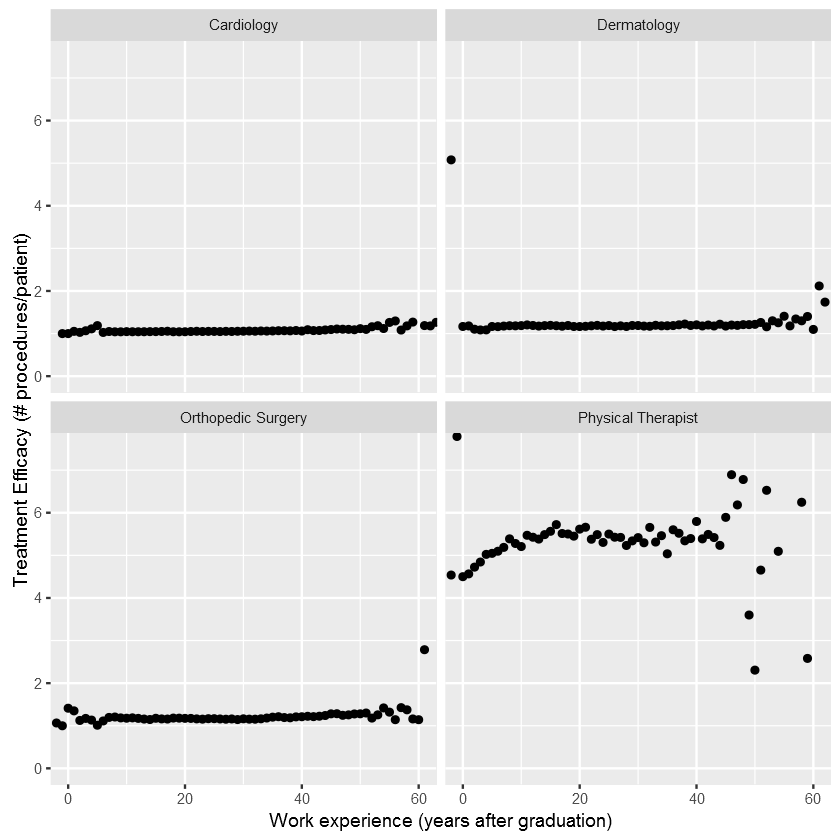

In [28]:
g <- ggplot(median_freq, aes(expyrs, med_effic)) + geom_point() 
g = g + facet_wrap(~provider_type, nrow=2) #+geom_smooth(method='lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,60),ylim = c(0,7.5))
g + labs(x='Work experience (years after graduation)', y='Treatment Efficacy (# procedures/patient)')

4) Productivity (but not necessarily quality of care) depends on experience.    
A provider treats more patients (and performs more procedures/unit time) after years of experience. 
However, the treatment efficacy is stable over the course of the physician's career (i.e. roughly the same # of procedure/patient).
So increased output might be explained if appointment durations shorten over the years. Treatment efficacy is very close to one,
so it might be difficult to see improvement in quality of care just by looking at this measure.

#### Diversity of procedure codes across specialities

In [31]:
#Select for physician types:
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Orthopedic Surgery')
cc = physician_info[provider_type %in% phys_sel] #provider info (and list of npis) within the top popular provider types. 
setkey(cc,npi)
sub_npi_ccs = npi_vs_ccs[cc] # join on selected npi numbers (of popular types), pulling the npi specific info into procedure count

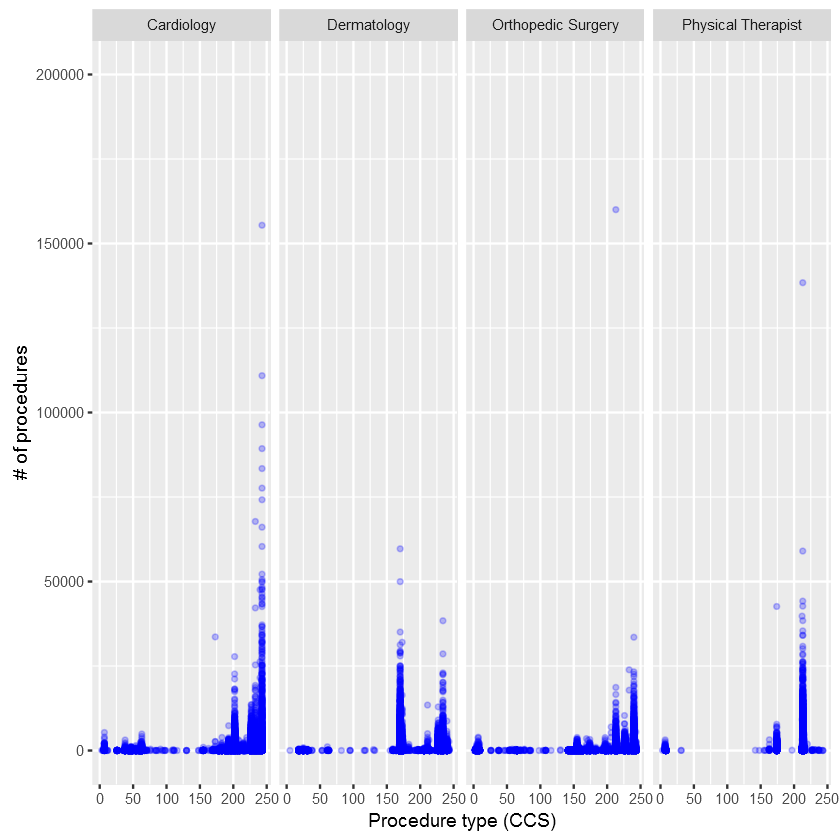

In [30]:
g <- ggplot(sub_npi_ccs, aes(ccs_code, proc_cnt)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g <- g + facet_wrap(~provider_type, nrow=1) + coord_cartesian(ylim = c(0,200000))
g + labs(x='Procedure type (CCS)', y='# of procedures')

Range of treatments could identify the provider's speciality